# 1. Introduction

In this notebook we are going to deal with a supervised learning(learning with a teacher) problem called **Classification** using **Ensembling**. Ensembles are the combinations of classifiers generated from the dataset sampling.

## 1.1. Classification

It is one type of supervised learning method where the target variable is categorical. The problem can be of binary class classification i.e. whether an email is spam or not, loan will be default or not etc. or it can be multiclass classification, predicting the type of fruit on the shape, size and colour.

There a numerous techniques to solve such task. In this notebook we are going to work on Breast Cancer dataset defined in scikit-learn using **Random Forest**.

### 1.1.1 Random Forest
Random Forest is an ensemble method of learning which is an extension to the DecisionTree algorithm. The problem with the DecisionTree is that it suffers from the overfitting and is not able to handle missing and imbalanced data. Random Forest uses bagging(bootstrap aggregating), which combines weak decision tree classifiers into a single one. It can work well with high dimensional data.


# 2. Steps Involved:
    0. Importing the required libraries - for importing all the dependencies.
    1. Making the functions of the required steps
    2. Importing dataset
    3. Exploratory Data Analysis (EDA) - for checking the nature and structure of the dataset
    4. Feature Engineering - for getting features from the dataset
    5. Model Building - for building the model (using sklearn)
    6. Model Training - fitting the model for classification
    7. Model Testing
    8. Model Evaluation
    9. Saving the model - for re-use.
    10.Tree Visualization
    
# 3. Prerequisites

## 3.1 Dataset 
breast cancer data has been used as dataset which consist of 31 columns:
    1. mean radius
    2. mean texture
    3. mean perimeter
    4. mean area
    5. mean smoothness
    6. mean compactness
    7. mean concavity   
    8. mean concave points
    9. mean symmetry
    10.mean fractal dimension
    11.radius error
    12.texture error
    13.perimeter error
    14.area error
    15.smoothness error
    16.compactness error
    17.concavity error
    18.concave points error
    19.symmetry error
    20.fractal dimension error
    21.worst radius
    22.worst texture
    23.worst perimeter
    24.worst area
    25.worst smoothness
    26.worst compactness
    27.worst concavity
    28.worst concave points
    29.worst symmetry
    30.worst fractal dimension
    31.tumor class

    
## 3.2 Libraries Requirements 
``` 
    numpy == 1.16.3
    pandas == 0.24.2
    matplotlib == 3.0.3
    seaborn == 0.9.0
    ipython == 7.5.0
    scikit_learn == 0.21.2
```
    
# 4. Use Case
Some famous use cases of Random Forest are :
    1. Microsoft uses Random Forest for predicting the movements of the user
    2. In Banking, random forest can be used to identify the fraudulent transactions

## Step 0. Importing the required libraries

In [1]:
import os
import pickle
# Importing dataset from scikit-learn
from sklearn.datasets import load_breast_cancer

import pandas as pd
import numpy as np

# Data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image

## Step 1. Making functions of the required steps

In [2]:
# FUNCTION FOR CONVERTING THE DATA INTO DATAFRAME
# Input: bunch object
# Output: dataframe

def to_df(cancer):
    data = np.append(cancer['data'], cancer['target'].reshape(-1, 1), axis=1)
    cols = np.append(cancer['feature_names'], ['tumor class'])
    df = pd.DataFrame(data, columns=cols)
    
    return df

In [3]:
# FUNCTION FOR PLOTTING HEATMAP OF CORRELATED FEATURES
# Input: dataframe
# Output: heatmap that shows correlation

def plt_heatmap(df):
    sns.heatmap(df.corr(), annot=True, cmap='hot')
    plt.show()

In [4]:
# FUNCTION FOR DROPPING HIGHLY CORRELATED FEATURES
# Considering correlation > 0.90
# Input: dataframe
# Output: cleaned dataframe

def drop_correlated(df):
    # Create correlation matrix
    corr_matrix = df.corr().abs()
    
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # Find index of feature columns with correlation greater than 0.90
    to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
    
    # Drop features
    df = df.drop(to_drop, axis=1)
    
    return df

In [5]:
# FUNCTION FOR GETTING FEATURES AND LABELS FROM DATA
# Input: dataframe
# Output: feature and label

def get_feature_label(df):
    X = df.iloc[:, 0:20].values
    y = df.iloc[:, -1].values
    
    return X, y

In [6]:
# FUNCTION FOR SAVING THE MODEL
# Input: model object, file name
# Output: pickle file of the model

def save_pickle(model_object, file_name):
    file_pkl = open(file_name, 'wb')
    pickle.dump(model_object, file_pkl)
    file_pkl.close()

In [7]:
# FUNCTION FOR SPLITTING DATASET INTO TRAIN AND TEST
# Input: Input features and label
# Output: Splitted dataset into train and test

def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                       random_state=5, stratify=y)
    return X_train, X_test, y_train, y_test

In [8]:
# FUNCTION FOR MODEL BUILDING
# Input: null
# Output: model

def build_model():
    random_forest = RandomForestClassifier(random_state=5)
    return random_forest

In [9]:
# FUNCTION FOR MODEL TRAINING
# Input: model object, training feature and labels
# Output: trained model

def train_model(random_forest, X_train, y_train):
    random_forest.fit(X_train, y_train)

In [10]:
# FUNCTION FOR MODEL TESTING
# Input: model object, test feature and true values
# Output: predicted values

def test_model(random_forest, X_test):
    y_pred = random_forest.predict(X_test)
    
    return y_pred

In [11]:
# FUNCTION FOR MODEL EVALUATION
# Input: True values and predicted values
# Output: Accuracy score and confusion matrix

def eval_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print("Accuracy= {:.2f}%".format(100 * accuracy))
    print("Confusion Matrix:", cm, sep='\n')

In [12]:
# FUNCTION FOR LOADING THE SAVED MODELS
# Input: pickle file name
# Output: model object

def load_model(pkl_name):
    pkl = open(pkl_name, 'rb')
    model_object = pickle.load(pkl)
    pkl.close()
    
    return model_object

In [13]:
# FUNCTION FOR GENERATING THE DOT FILE OF MODEL
# Input: model object, feature names and target names
# Output: dot file

def gen_model_dot(random_forest, tree_index, feature_list, target_names, dot_name):
    # Extract single tree
    estimator = random_forest.estimators_[tree_index]
    # Export as dot file
    graph = export_graphviz(estimator, out_file=dot_name,
                            feature_names = feature_list,
                            class_names = target_names,
                            rounded = True, proportion = False,
                            precision = 2, filled = True)

In [14]:
# FUNCTION FOR CONVERTING DOT FILE TO PNG
# Input: dot file path and png file path
# Output: png image

def dot_to_png(dot_path, png_path):
    os.system('dot -Tpng ' + dot_path + ' -o ' + png_path + ' -Gdpi=600')

## Step 2. Importing dataset

In [15]:
# Loading data
cancer = load_breast_cancer()    

cancer_df = to_df(cancer)

## Step 3. Exploratory Data Analysis

In [16]:
# Checking the structure of data
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [17]:
# Checking the shape of data
# First entry represent the number of rows and second represents columns
cancer_df.shape

(569, 31)

In [18]:
# Checking the dataset
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  tumor class  
0          0.4601                  0.11890          0.0  
1          0.2750                  0.08902          0.0  
2          0.3613                  0.08758          0.0  
3          0.6638                  0.17300          0.0  
4          0.2364                  0.07678          0.0  

[5 rows x 31 columns]

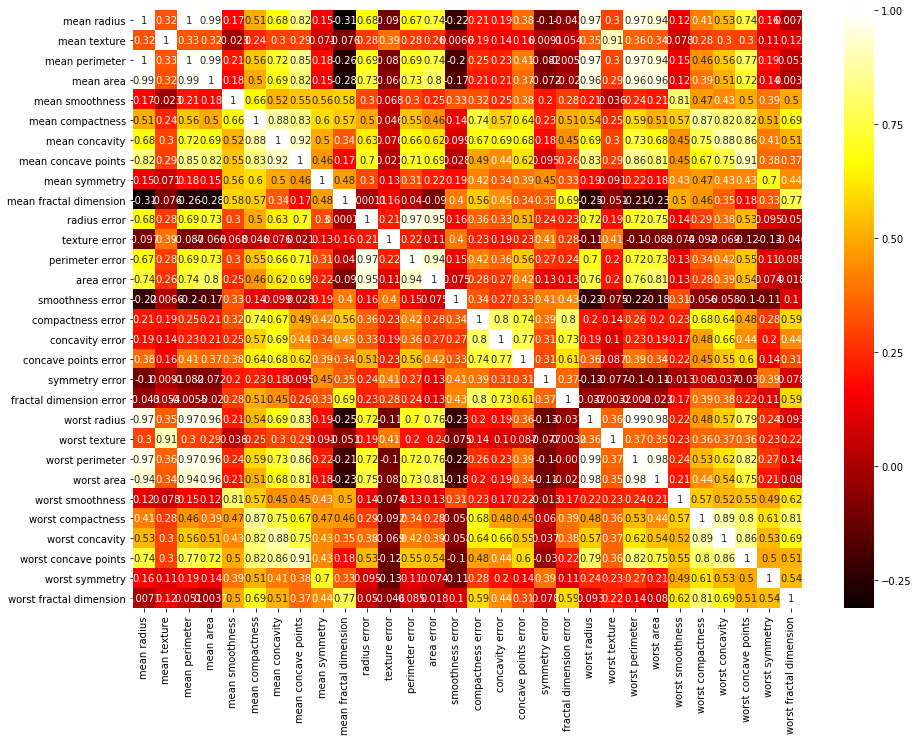

In [19]:
# Plotting heatmap
plt.rcParams["figure.figsize"] = [15, 11]
plt_heatmap(cancer_df.iloc[:, :30])

## Step 4. Feature Engineering

In [20]:
# Dropping correlated features
cancer_df = drop_correlated(cancer_df)

In [21]:
# New shape of dataframe
cancer_df.shape

(569, 21)

In [22]:
# Getting feature and label
X, y = get_feature_label(cancer_df)

In [23]:
# Splitting dataset into train and test set
X_train, X_test, y_train, y_test = split_data(X, y)

## Step 5. Model Building

In [24]:
# Building the model
random_forest = build_model()

## Step 6. Model Training

In [25]:
# Training the model
train_model(random_forest, X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Step 7. Model Testing

In [26]:
# Testing the model
y_pred = test_model(random_forest, X_test)

## Step 8. Model Evaluation

In [27]:
# Performance of the model
eval_model(y_test, y_pred)

Accuracy= 96.49%
Confusion Matrix:
[[41  1]
 [ 3 69]]


## Step 9. Saving the model

In [28]:
# Saving the trained model
save_pickle(random_forest, 'models/random_forest_cancer.pkl')

## Step 10. Tree Visualization

In [29]:
# Generating dot file
gen_model_dot(random_forest, tree_index=5,
              feature_list=cancer_df.columns[:20],
              target_names=cancer.target_names,
              dot_name='readonly/tree.dot')

In [30]:
# Generating png from dot file
dot_to_png(dot_path='readonly/tree.dot',
           png_path='images/tree.png')

In [31]:
# Display tree from png
Image(filename='images/tree.png')